# Titanic Dataset Challenge

In [72]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile as zipfile
from sklearn.model_selection import train_test_split , cross_val_score as cvs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix as cm, classification_report as cr
from sklearn.inspection import permutation_importance as pm

Unzip

## Data Input

In [36]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Preparation and Cleaning

In [37]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


Where most people embarked from

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


c:\Users\Ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


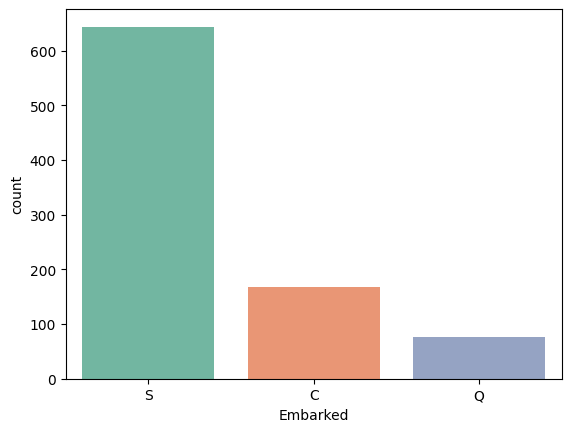

In [40]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_df, palette='Set2')
plt.show()

In [41]:
print(train_df['Embarked'].value_counts().idxmax())

S


In [42]:
NA_Values = train_df.isna().sum().sort_values(ascending=False)
NA_Values_perc = train_df.isna().sum().sort_values(ascending=False) *100 / len(train_df)
NA_Values_perc

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

MEAN
will fill missing values with median

In [43]:
median_Age = train_df["Age"].median(skipna=True)
print('%.2f' %median_Age)

29.70
28.00


In [44]:
missing_percentages = train_df.isna().sum().sort_values(ascending=False) *100 / len(train_df)
missing_percentages

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

Cabin(70%), Age(19.8%) and no. of embarked people(0.2%) have NULL Values
Cabin will be removed from the dataset

In [45]:
print('Testing data shape: ', test_df.shape)
test_df.head()

Testing data shape:  (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [47]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Filling test data  with median values and dropping non-relevant columns

In [48]:
test_df.isnull().sum()
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

MODEL- Linear Regression

In [49]:
train_data.head()
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,Q
1,893,3,female,47.0,1,0,363272,7.0000,S
2,894,2,male,62.0,0,0,240276,9.6875,Q
3,895,3,male,27.0,0,0,315154,8.6625,S
4,896,3,female,22.0,1,1,3101298,12.2875,S


In [50]:
train_data['Sex'] = train_data['Sex'].replace(['female','male'], [0, 1])
test_data['Sex'] = test_data['Sex'].replace(['female','male'], [0,1])
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,1,34.5,0,0,330911,7.8292,Q
1,893,3,0,47.0,1,0,363272,7.0000,S
2,894,2,1,62.0,0,0,240276,9.6875,Q
3,895,3,1,27.0,0,0,315154,8.6625,S
4,896,3,0,22.0,1,1,3101298,12.2875,S


Taking relevant columns for the model

In [51]:
cols = ["Sex", "SibSp", "Parch", "Fare",]
X = train_data[cols]
Y = train_data['Survived']

taking 80% as training data and 20% as test data
random_state is the seed for the random no. generator(is used for generating same random no.s when we share the model with others)

In [52]:
train_data, val_data, train_labels, val_labels = train_test_split(X ,Y, test_size=0.2, random_state=42)

In [53]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data)
X_test = scaler.transform(val_data)

threshold = 0.5 set to make boundary between alive and dead (is default)

In [54]:
# Create and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(train_data, train_labels)
threshold = 0.5


In [55]:
# Make predictions on the test set
y_pred = model.predict(val_data)

### Evaluation of Model

In [56]:
#Evaluate the model
accuracy = accuracy_score(val_labels, y_pred)
classification_report_str = cr(val_labels, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.78

Confusion Matrix:
 [[88 17]
 [22 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



Confusion matrix is very useful for binary classification 
    - annot is used to display actual numerical values in each cell of the heatmap (fmt is format for annot (d is for decimal))
    - cmap is predefined colormap(from sns) used in heatmaps 
    - 

Text(50.722222222222214, 0.5, 'Ground Truth')

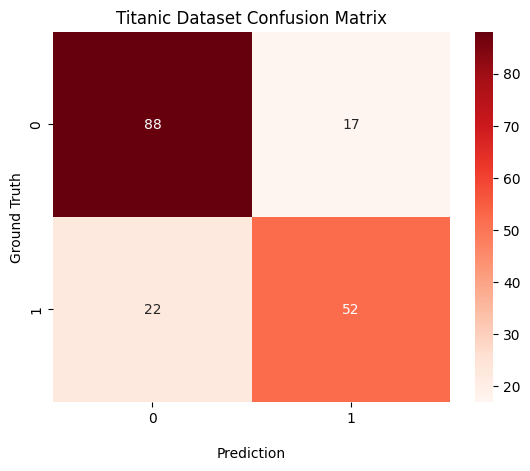

In [61]:
confusion = cm(val_labels, y_pred)
ax = sns.heatmap(confusion, annot=True,fmt='d',cmap='Reds')
ax.set_title("Titanic Dataset Confusion Matrix")
ax.set_xlabel('\nPrediction')
ax.set_ylabel('Ground Truth')

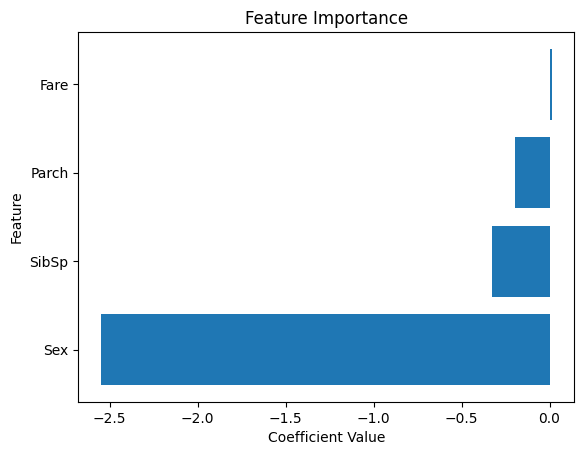

In [62]:
# Plotting coefficients (feature importance)
coefficients = model.coef_[0]
feature_names = list(X.columns)
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Permutation Importance
    -checks accuracy of a model(performance) when values of feature are randomly shuffled
    -

c:\Users\Ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, 

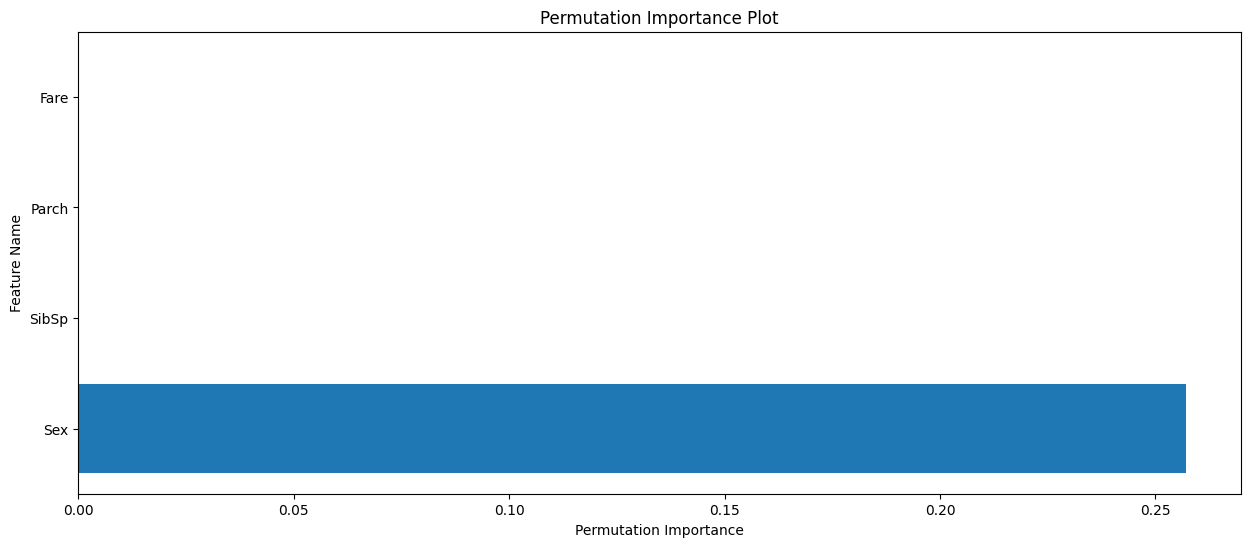

In [67]:
perm_importance = pm(model, X_test, val_labels, n_repeats=30, random_state=42)
feature_names = list(X.columns)
plt.figure(figsize=(15, 6))
plt.barh(feature_names, perm_importance.importances_mean)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature Name')
plt.title('Permutation Importance Plot')
plt.show()

K-Fold Cross Validation
    -is a method to evaluate model performance on multiple different subsets of data

In [74]:
# Perform k-fold cross-validation (e.g., 5-fold)
num_folds = 5
cv_scores = cvs(model, X_train, train_labels, cv=num_folds, scoring='accuracy')

# Print cross-validation results
for i, score in enumerate(cv_scores, 1):
    print(f'Fold {i}: Accuracy = {score:.4f}')

# Calculate and print the mean accuracy
mean_accuracy = cv_scores.mean()
print(f'Mean Accuracy (across {num_folds} folds): {mean_accuracy:.4f}')

Fold 1: Accuracy = 0.7902
Fold 2: Accuracy = 0.8042
Fold 3: Accuracy = 0.7746
Fold 4: Accuracy = 0.7535
Fold 5: Accuracy = 0.8239
Mean Accuracy (across 5 folds): 0.7893


(question - figure out why its is heavily on one variable)
    -its bad becuase it'll lack generalization
    - model bias hoga
    - maybe m ignoring potentially relevant features(Embarkment,etc)